# HOW TO RETRIEVE AND USE VOLCANO DATA

# Envirosensor data

GeoNet collects [environmental data](https://www.geonet.org.nz/data/types/environmental) in a similar way to New Zealand regional councils collect data to monitor river levels, rainfall, air quality, soil characteristics, etc. In the GeoNet context, the term “environmental data” is used to describe a subset of those data, recorded in locations that enable the monitoring of landslides and volcanoes. We refer to these data as "envirosensor data".

Envirosensor data are available through [GeoNet's Tilde API (Application Program Interface)](https://tilde.geonet.org.nz/v4/api-docs/). There is also a [Data Discovery GUI](https://tilde.geonet.org.nz/ui/data-discovery) and a [Data Exploration GUI](https://tilde.geonet.org.nz/ui/data-exploration) for browser-based interactive data retrieval and basic analysis.

For additional information on how to use Tilde with volcano data please refer to the [Supplementary notes](https://www.geonet.org.nz/data/supplementary/volcano_tilde_notes)

## &nbsp;Table of contents
### 1. Basic requirements
### 2. MultiGas data - basic data retrieval and graphing
### 3. Fumarole and water temperatures - basic data retrieval and graphing
### 4. Water level data - basic data retrieval and graphing
### 5. Self potential and ground temperature data - basic data retrieval and graphing
### 6. Wind data - basic data retrieval and graphing
### 7. Rainfall data - basic data retrieval and graphing
### 8. Retrieval without specifying data collection method - using MultiGas data
### 9. Retrieval without specifying sensor code - using fumarole temperature data

## &nbsp;1. Basic requirements

### Import required Python modules/libraries

In [1]:
#for querying data
import requests
import json

#pandas for data analysis
import pandas as pd

#matplotlib for graphing
import matplotlib.pyplot as plt

#for getting CSV format data
from io import StringIO

#for system functions
import os

### Set the source URL

Using [API data endpoint](https://tilde.geonet.org.nz/v4/api-docs/endpoint/data)

In [2]:
#API version 4 data endpoint
source = 'https://tilde.geonet.org.nz/v4/data/'

## &nbsp;2. MultiGas data
## Basic data retrieval and graphing

We request MultiGas data on the concentration of carbon dioxide (CO$_2$) from the station near the summit of Ngauruhoe.

For all envirosensor data:
- domain = `envirosensor`

The specific parameters are:
  - station = `NA002`, the station code for the station near the summit of Ngauruhoe
  - name (type of data) = `air-CO2-conc`
  - sensorcode = `04`, code for the specific sensor number
  - method (of data collection) = `snapshot`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `NA002/air-CO2-conc/04/snapshot/-`

Date range:
 - startdate = `2024-08-01`
 - enddate = `2024-08-31`

Complete request
- `envirosensor/NA002/air-CO2-conc/04/snapshot/-/2024-08-01/2024-08-31`

In [3]:
url = source+'envirosensor/NA002/air-CO2-conc/04/snapshot/-/2024-08-01/2024-08-31'

We will now query the URL and ask for a CSV format to be returned. A 200 response code indicates everything went okay, and the result has been returned (if any).

In [4]:
r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

<Response [200]>


To work with the observation data we will use python's [pandas module](https://pandas.pydata.org/). We will now store the response of our request in a pandas dataframe (`df`), using `pd.read_csv`. By using `parse_dates=['timestamp']` we can convert the 'timestamp' column to a datetime, which makes it easier to work with the data. We add `date_format='ISO8601'` to ensur that pandas uses the full `ISO 8601` datetime format we record our data in. Using `index_col`, we can set the date and time as the index of the dataframe. More information on `pd.read_csv` can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html. We need to use the `StringIO` function with the text returned from our query. By printing the beginning of the result, with `df.head()`, we can see the first 5 lines of the dataframe from our query.

Once we have the data in the dataframe, we can begin to our analysis.

In [5]:
df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2024-08-01 00:00:00+00:00,envirosensor,NA002,air-CO2-conc,4,snapshot,nil,421.197,ppm,0.0,ppm,NaN
2024-08-01 00:10:00+00:00,envirosensor,NA002,air-CO2-conc,4,snapshot,nil,423.190,ppm,0.0,ppm,NaN
2024-08-01 00:20:00+00:00,envirosensor,NA002,air-CO2-conc,4,snapshot,nil,431.382,ppm,0.0,ppm,NaN
2024-08-01 00:30:00+00:00,envirosensor,NA002,air-CO2-conc,4,snapshot,nil,423.559,ppm,0.0,ppm,NaN
2024-08-01 00:40:00+00:00,envirosensor,NA002,air-CO2-conc,4,snapshot,nil,425.215,ppm,0.0,ppm,NaN


### Data Summary
By using `df.describe()` we can summarise the returned data as this features generates descriptive statistics from dataframes. We can see the number of values (and errors). All the qc values are currently undefined. By default, we also get to see the mean, standard deviation, minimum, maximum, and some percentile values.

In [6]:
df.describe()

,sensorCode,value,error,qualityControl
count,4290.0,4290.000000,4290.0,0.0
mean,4.0,515.576847,0.0,NaN
std,0.0,194.351834,0.0,NaN
min,4.0,1.063170,0.0,NaN
25%,4.0,440.108000,0.0,NaN
50%,4.0,456.241000,0.0,NaN
75%,4.0,487.626250,0.0,NaN
max,4.0,2297.220000,0.0,NaN


### Basic Data Plot
By using the value column from our dataframe we are able to produce a basic graph of the CO$_2$ concentration against time. The periodic downward spikes are part of the calibration process for the CO$_2$ sensor.

Text(0, 0.5, 'CO$_2$ concentration (ppm)')

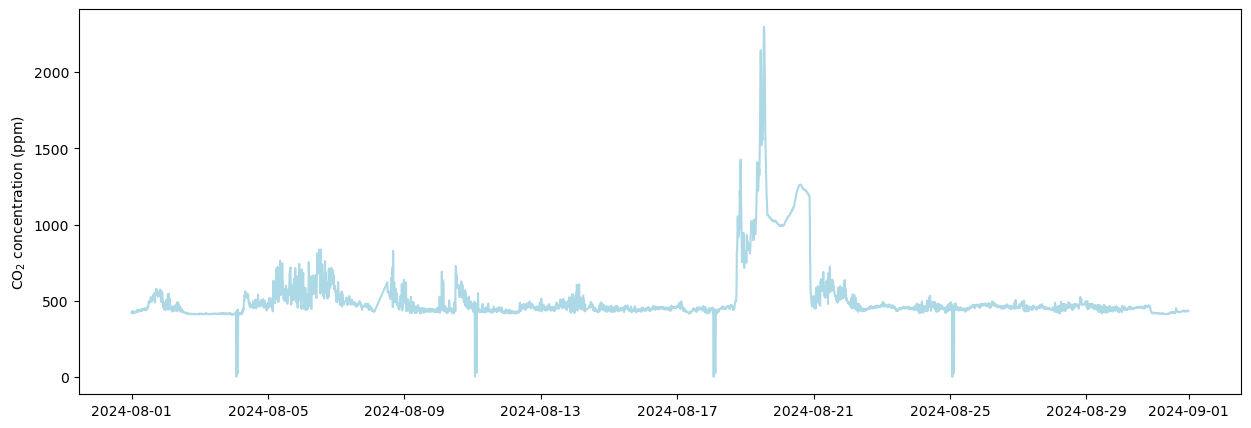

In [7]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='lightblue')
ax.set_ylabel('CO$_2$ concentration (ppm)')

### Recent data

Date range:
The date range can be specified as `latest` followed by a time interval, e.g. `latest/7d` for data from the latest 7 days. The longest time interval is 30 days.
- dates = `latest/7d` can be used to replace the startdate/enddate.

Complete request:
- `envirosensor/NA002/air-CO2-conc/04/snapshot/-/latest/7d`

In [8]:
url = source+'envirosensor/NA002/air-CO2-conc/04/snapshot/-/latest/7d'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2024-12-03 03:00:00+00:00,envirosensor,NA002,air-CO2-conc,4,snapshot,nil,447.510,ppm,0.0,ppm,NaN
2024-12-03 03:10:00+00:00,envirosensor,NA002,air-CO2-conc,4,snapshot,nil,420.453,ppm,0.0,ppm,NaN
2024-12-03 03:20:00+00:00,envirosensor,NA002,air-CO2-conc,4,snapshot,nil,442.357,ppm,0.0,ppm,NaN
2024-12-03 03:30:00+00:00,envirosensor,NA002,air-CO2-conc,4,snapshot,nil,418.284,ppm,0.0,ppm,NaN
2024-12-03 03:40:00+00:00,envirosensor,NA002,air-CO2-conc,4,snapshot,nil,434.208,ppm,0.0,ppm,NaN


#### Basic Data Plot
By using the value column from our dataframe we are able to produce a basic graph of the CO$_2$ concentration against time for the past 7 days.

Text(0, 0.5, 'CO$_2$ concentration (ppm)')

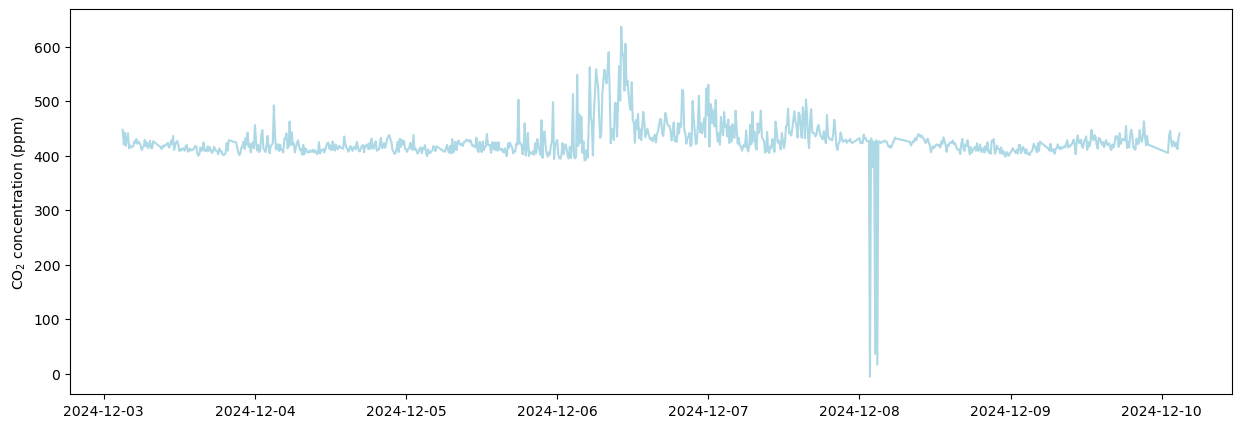

In [9]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='lightblue')
ax.set_ylabel('CO$_2$ concentration (ppm)')

## &nbsp;3. Fumarole and water temperatures
## Basic data retrieval and graphing

We request data on fumarole temperature from Upper Te Maari Fumarole 6.

For all envirosensor data:
- domain = `envirosensor`

The specific parameters are:
  - station = `TO006`, the station code for Upper Te Maari Fumarole 6
  - name (type of data) = `fumarole-temperature`
  - sensorcode = `02`, code for the specific sensor number
  - method (of data collection) = `snapshot`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `TO006/fumarole-temperature/02/snapshot/-`

Date range:
  - startdate = `2024-01-01`
  - enddate = `2024-06-30`

Complete request
- `envirosensor/TO006/fumarole-temperature/02/snapshot/-/2024-01-01/2024-06-30`

In [10]:
url = source+'envirosensor/TO006/fumarole-temperature/02/snapshot/-/2024-01-01/2024-06-30'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2024-01-01 00:00:00+00:00,envirosensor,TO006,fumarole-temperature,2,snapshot,south-vent,88.76229,degC,0.0,degC,NaN
2024-01-01 00:10:00+00:00,envirosensor,TO006,fumarole-temperature,2,snapshot,south-vent,88.71896,degC,0.0,degC,NaN
2024-01-01 00:20:00+00:00,envirosensor,TO006,fumarole-temperature,2,snapshot,south-vent,88.64094,degC,0.0,degC,NaN
2024-01-01 00:30:00+00:00,envirosensor,TO006,fumarole-temperature,2,snapshot,south-vent,88.71663,degC,0.0,degC,NaN
2024-01-01 00:40:00+00:00,envirosensor,TO006,fumarole-temperature,2,snapshot,south-vent,89.01661,degC,0.0,degC,NaN


### Basic Data Plot
By using the value column from our dataframe we are able to produce a basic graph of fumarole temperature against time. The overall trend is downward, but that trend is disrupted by many downward spikes in measured temperature. Those spikes are believed to occur when strong wind blows air into the fumarole orifice, where the temperature is being measured, and lowers the temperature.

Text(0, 0.5, 'fumarole temperature ($^o$C)')

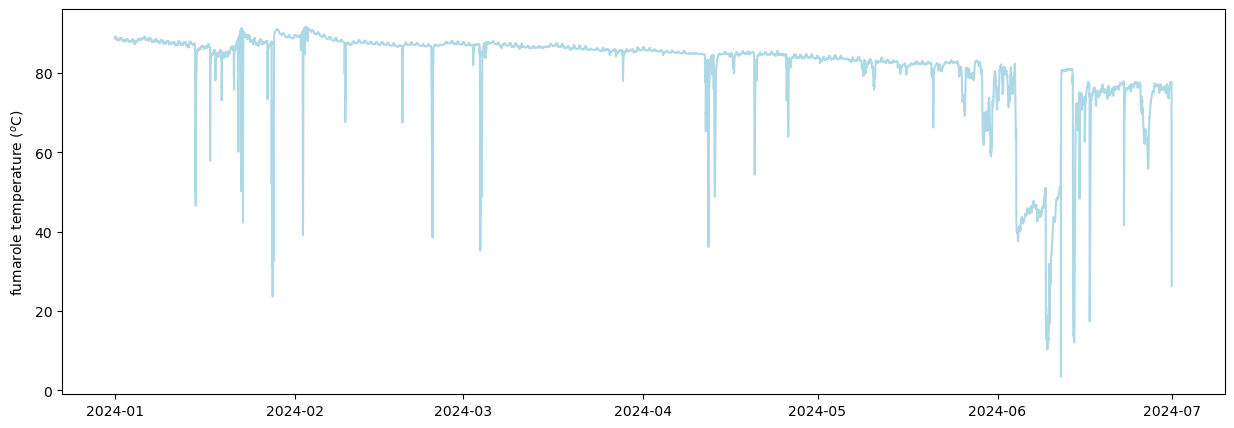

In [11]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='lightblue')
ax.set_ylabel('fumarole temperature ($^o$C)')

### Water temperature

We request data on the water temperature from the lake in Inferno Crater.

For all envirosensor data:
- domain = `envirosensor`

The specific parameters are:
  - station = `OT001`, the station code for Inferno Crater
  - name (type of data) = `lake-temperature`
  - sensorcode = `01`, code for the specific sensor number
  - method (of data collection) = `snapshot`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `OT001/lake-temperature/01/snapshot/-`

Date range:
  - startdate = `2024-02-01`
  - enddate = `2024-05-31`

Complete request
- `envirosensor/OT001/lake-temperature/01/snapshot/-/2024-02-01/2024-05-31`

In [12]:
url = source+'envirosensor/OT001/lake-temperature/01/snapshot/-/2024-02-01/2024-05-31'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2024-02-01 00:00:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,60.83603,degC,0.0,degC,NaN
2024-02-01 00:10:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,60.86779,degC,0.0,degC,NaN
2024-02-01 00:20:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,60.75852,degC,0.0,degC,NaN
2024-02-01 00:30:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,60.62638,degC,0.0,degC,NaN
2024-02-01 00:40:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,60.55436,degC,0.0,degC,NaN


### Basic Data Plot
By using the value column from our dataframe we are able to produce a basic graph of water temperature against time.

Text(0, 0.5, 'water temperature ($^o$C)')

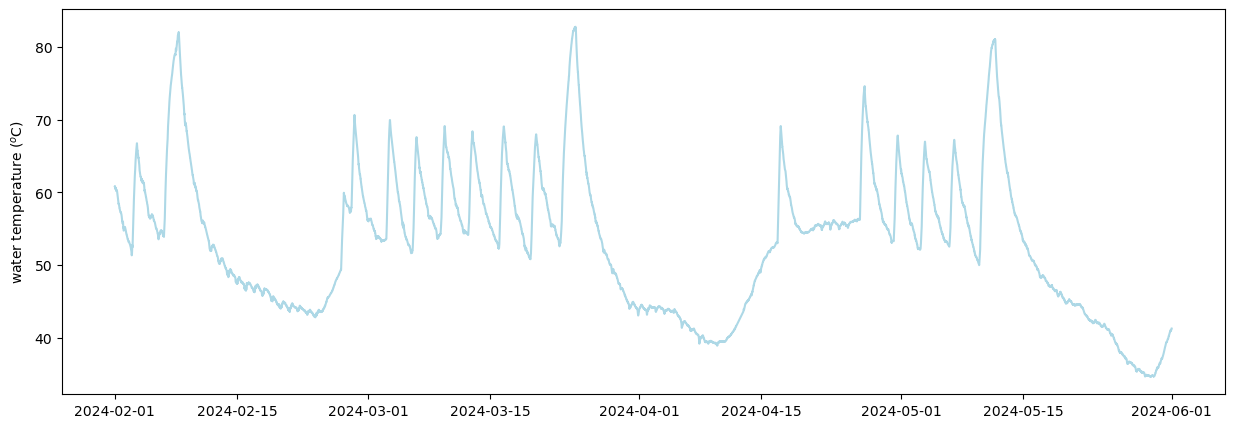

In [13]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='lightblue')
ax.set_ylabel('water temperature ($^o$C)')

## &nbsp;4. Water level data
## Basic data retrieval and graphing

We request data on the water height from the lake in Inferno Crater.

For all envirosensor data:
- domain = `envirosensor`

The specific parameters are:
  - station = `OT001`, the station code for Inferno Crater
  - name (type of data) = `lake-height`
  - sensorcode = `03`, code for the specific sensor number
  - method (of data collection) = `snapshot`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `OT001/lake-height/03/snapshot/-`

Date range:
  - startdate = `2024-02-01`
  - enddate = `2024-05-31`

Complete request
- `envirosensor/OT001/lake-height/03/snapshot/-/2024-02-01/2024-05-31`

In [14]:
url = source+'envirosensor/OT001/lake-height/03/snapshot/-/2024-02-01/2024-05-31'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2024-02-01 00:00:00+00:00,envirosensor,OT001,lake-height,3,snapshot,nil,7.536027,m,0.0,m,NaN
2024-02-01 00:10:00+00:00,envirosensor,OT001,lake-height,3,snapshot,nil,7.540247,m,0.0,m,NaN
2024-02-01 00:20:00+00:00,envirosensor,OT001,lake-height,3,snapshot,nil,7.539543,m,0.0,m,NaN
2024-02-01 00:30:00+00:00,envirosensor,OT001,lake-height,3,snapshot,nil,7.538840,m,0.0,m,NaN
2024-02-01 00:40:00+00:00,envirosensor,OT001,lake-height,3,snapshot,nil,7.534621,m,0.0,m,NaN


#### Basic Data Plot
By using the value column from our dataframe we are able to produce a basic graph of the water height against time.

Text(0, 0.5, 'water height (m)')

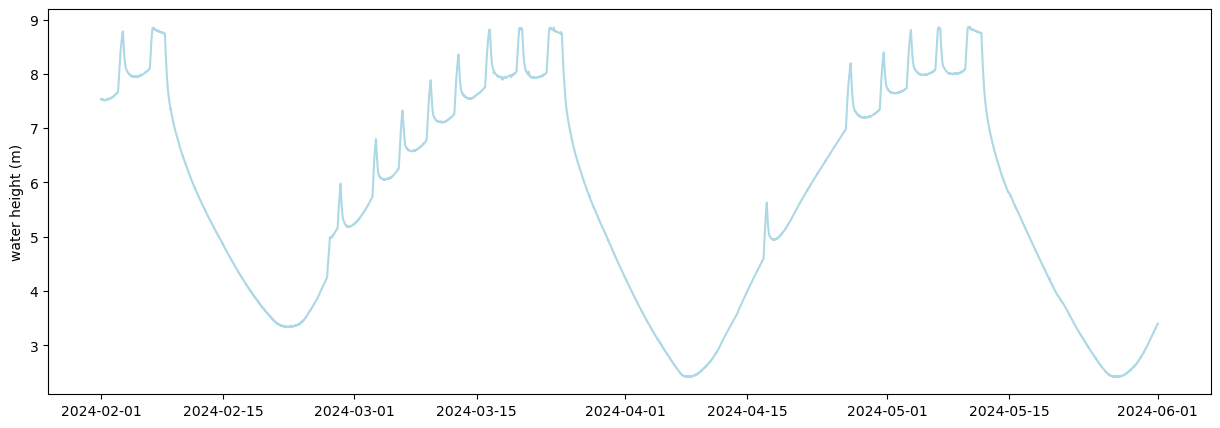

In [15]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='lightblue')
ax.set_ylabel('water height (m)')

## &nbsp;5. Self potential and ground temperature
## Basic data retrieval and graphing

We request data on ground self potential from Upper Te Maari Fumarole 3.

For all envirosensor data:
- domain = `envirosensor`

The specific parameters are:
  - station = `TO003`, the station code for Upper Te Maari Fumarole 3
  - name (type of data) = `ground-selfpotential`
  - sensorcode = `09`, code for the specific sensor number
  - method (of data collection) = `snapshot`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `TO003/ground-selfpotential/09/snapshot/-`

Date range:
  - startdate = `2024-02-01`
  - enddate = `2024-05-31`

Complete request
- `envirosensor/TO003/ground-selfpotential/09/snapshot/-/2024-02-01/2024-05-31`

In [16]:
url = source+'envirosensor/TO003/ground-selfpotential/09/snapshot/-/2024-02-01/2024-05-31'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2024-02-01 00:00:00+00:00,envirosensor,TO003,ground-selfpotential,9,snapshot,20-m-north-relative-to-enclosure,-261.3,mV,0.0,mV,NaN
2024-02-01 00:10:00+00:00,envirosensor,TO003,ground-selfpotential,9,snapshot,20-m-north-relative-to-enclosure,-261.7,mV,0.0,mV,NaN
2024-02-01 00:20:00+00:00,envirosensor,TO003,ground-selfpotential,9,snapshot,20-m-north-relative-to-enclosure,-262.7,mV,0.0,mV,NaN
2024-02-01 00:30:00+00:00,envirosensor,TO003,ground-selfpotential,9,snapshot,20-m-north-relative-to-enclosure,-263.1,mV,0.0,mV,NaN
2024-02-01 00:40:00+00:00,envirosensor,TO003,ground-selfpotential,9,snapshot,20-m-north-relative-to-enclosure,-263.3,mV,0.0,mV,NaN


### Basic Data Plot
By using the value column from our dataframe we are able to produce a basic graph of self potential against time. The self potential value is measured relative to a "base location" so the values can be both positive or negative.

Text(0, 0.5, 'self potential (mV)')

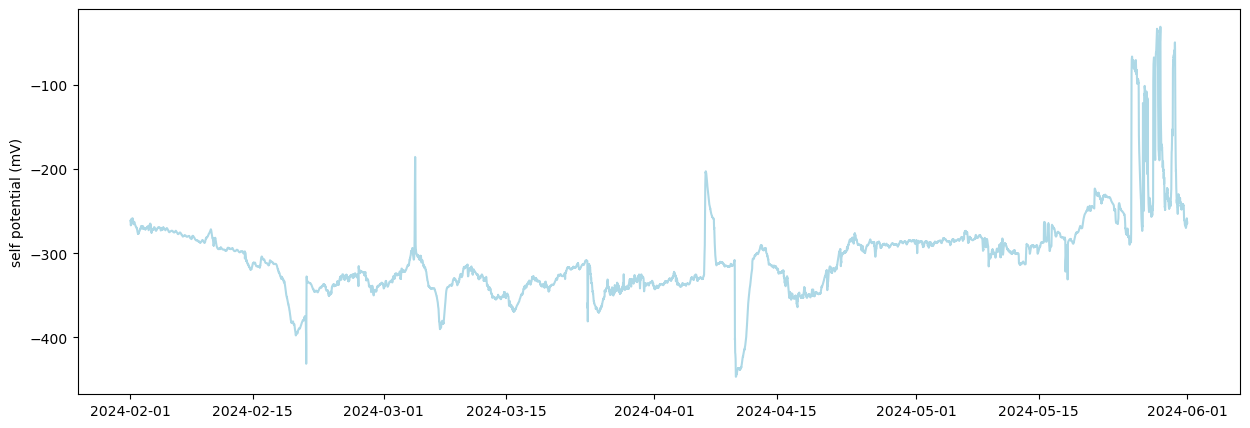

In [17]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='lightblue')
ax.set_ylabel('self potential (mV)')

### Ground temperature

Ground temperature is measured together with self potential as it is required for proper interpretation of the self potential data. We request data on ground temperature from Upper Te Maari Fumarole 3.

For all envirosensor data:
- domain = `envirosensor`

The specific parameters are:
  - station = `TO003`, the station code for Upper Te Maari Fumarole 3
  - name (type of data) = `ground-temperture`
  - sensorcode = `07`, code for the specific sensor number
  - method (of data collection) = `snapshot`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `TO003/ground-temperature/07/snapshot/-`

Date range:
  - startdate = `2024-02-01`
  - enddate = `2024-05-31`

Complete request
- `envirosensor/TO003/ground-temperature/07/snapshot/-/2024-02-01/2024-05-31`

In [18]:
url = source+'envirosensor/TO003/ground-temperature/07/snapshot/-/2024-02-01/2024-05-31'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2024-02-01 00:00:00+00:00,envirosensor,TO003,ground-temperature,7,snapshot,20-m-south-of-enclosure,45.37,degC,0.0,degC,NaN
2024-02-01 00:10:00+00:00,envirosensor,TO003,ground-temperature,7,snapshot,20-m-south-of-enclosure,45.29,degC,0.0,degC,NaN
2024-02-01 00:20:00+00:00,envirosensor,TO003,ground-temperature,7,snapshot,20-m-south-of-enclosure,45.36,degC,0.0,degC,NaN
2024-02-01 00:30:00+00:00,envirosensor,TO003,ground-temperature,7,snapshot,20-m-south-of-enclosure,45.60,degC,0.0,degC,NaN
2024-02-01 00:40:00+00:00,envirosensor,TO003,ground-temperature,7,snapshot,20-m-south-of-enclosure,45.60,degC,0.0,degC,NaN


### Basic Data Plot
By using the value column from our dataframe we are able to produce a basic graph of ground temperature against time. There is a downward trend, possibly caused by cooling air temperatures moving into winter. There are also downward perturbations, possibly caused by periods of rain seeping into the ground causing cooling.

Text(0, 0.5, 'ground temperature ($^o$C)')

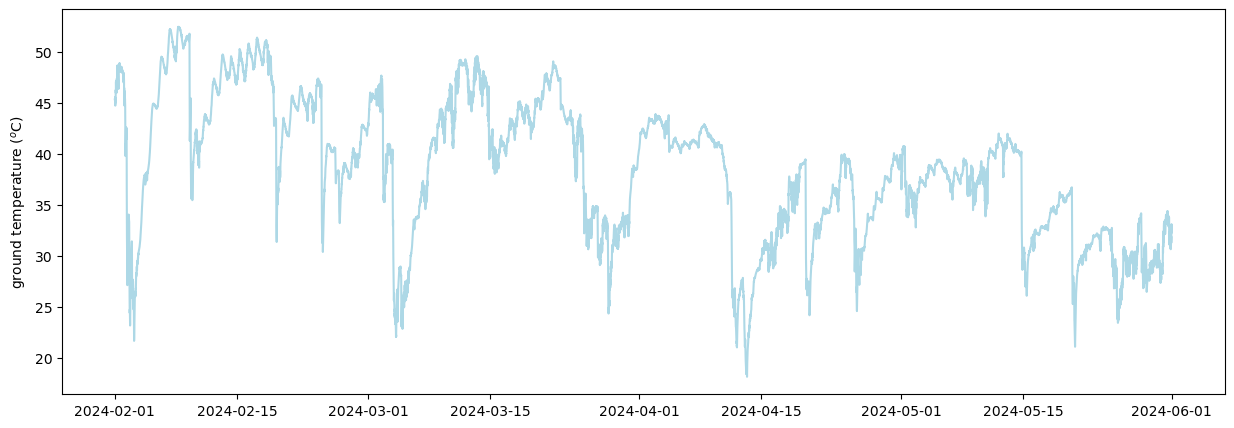

In [19]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='lightblue')
ax.set_ylabel('ground temperature ($^o$C)')

## &nbsp;6. Wind data
## Basic data retrieval and graphing

Wind data, specifically wind speed and wind direction are measured together with MultiGas.
We request wind speed data from the station near the summit of Ngauruhoe.

For all envirosensor data:
- domain = `envirosensor`

The specific parameters are:
  - station = `NA002`, the station code for the station near the summit of Ngauruhoe
  - name (type of data) = `wind-speed`
  - sensorcode = `07`, code for the specific sensor number
  - method (of data collection) = `snapshot`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `NA002/wind-speed/07/snapshot/-`

Date range:
  - startdate = `2024-08-01`
  - enddate = `2024-08-31`

Complete request
- `envirosensor/NA002/wind-speed/07/snapshot/-/2024-02-01/2024-05-31`

In [20]:
url = source+'envirosensor/NA002/wind-speed/07/snapshot/-/2024-02-01/2024-05-31'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2024-03-21 02:10:00+00:00,envirosensor,NA002,wind-speed,7,snapshot,nil,1.45,m/s,0.0,m/s,NaN
2024-03-21 02:20:00+00:00,envirosensor,NA002,wind-speed,7,snapshot,nil,2.94,m/s,0.0,m/s,NaN
2024-03-21 02:30:00+00:00,envirosensor,NA002,wind-speed,7,snapshot,nil,1.32,m/s,0.0,m/s,NaN
2024-03-21 02:40:00+00:00,envirosensor,NA002,wind-speed,7,snapshot,nil,2.04,m/s,0.0,m/s,NaN
2024-03-21 02:50:00+00:00,envirosensor,NA002,wind-speed,7,snapshot,nil,4.89,m/s,0.0,m/s,NaN


### Basic Data Plot
By using the value column from our dataframe we are able to produce a basic graph of wind speed against time.

Text(0, 0.5, 'wind speed (m/s)')

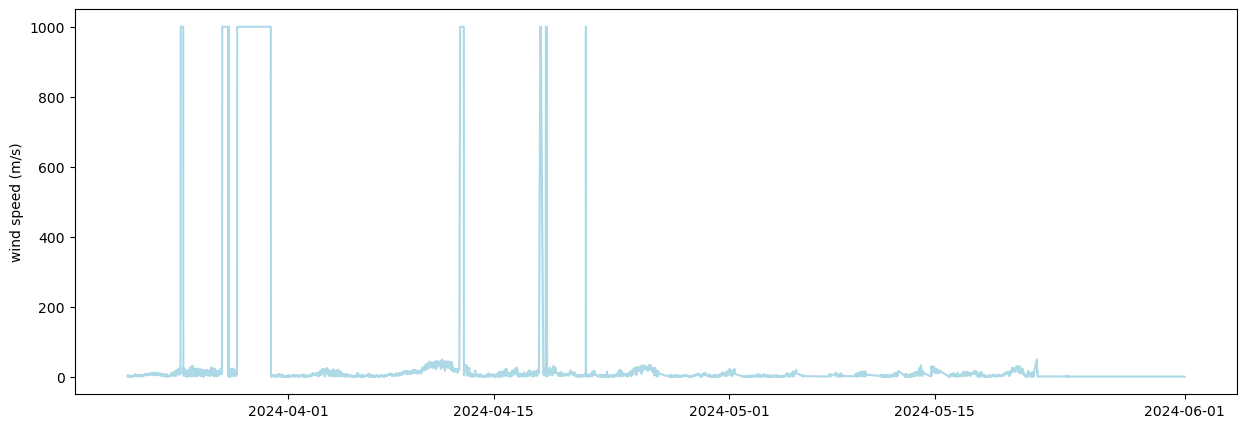

In [21]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='lightblue')
ax.set_ylabel('wind speed (m/s)')

#### Remove `999.99` values and replot

The [ultrasonic anemometer (wind sensor)](https://en.wikipedia.org/wiki/Anemometer#Ultrasonic_anemometers) produces `999.99` values if there is a sensor problem. If these values are not removed or graph limits set appropriately, a graphic is difficult to use.

Text(0, 0.5, 'wind speed (m/s)')

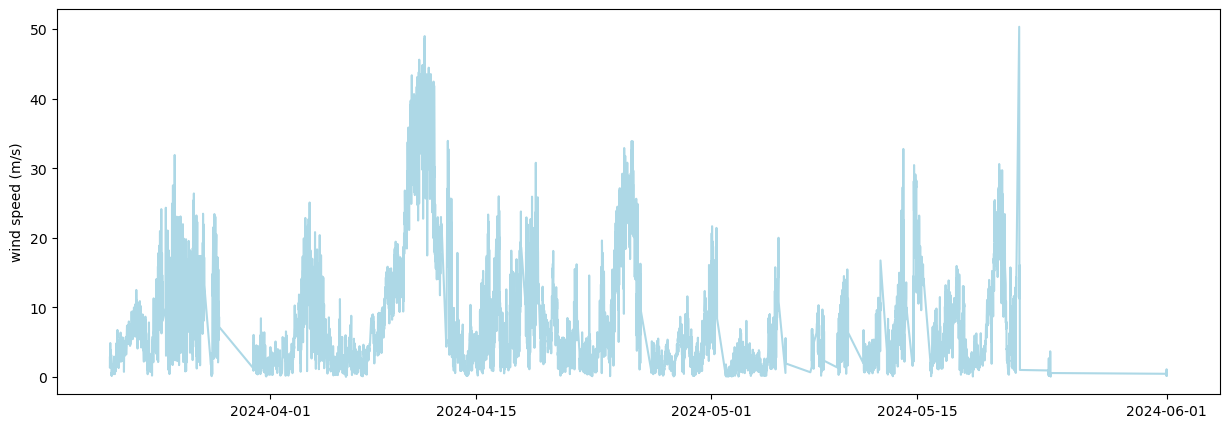

In [22]:
filtered = df[df['value']!=999.99]

fig,ax = plt.subplots(figsize=(15,5))
ax.plot(filtered.index, filtered['value'], color='lightblue')
ax.set_ylabel('wind speed (m/s)')

### Wind direction

We request wind direction data from the station near the summit of Ngauruhoe.

- name (type of data) = `wind-direction`
Everything else is unchanged

Complete request
- `envirosensor/NA002/wind-direction/07/snapshot/-/2024-02-01/2024-05-31`

In [23]:
url = source+'envirosensor/NA002/wind-direction/07/snapshot/-/2024-02-01/2024-05-31'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2024-03-21 02:10:00+00:00,envirosensor,NA002,wind-direction,7,snapshot,nil,116.0,deg,0.0,deg,NaN
2024-03-21 02:20:00+00:00,envirosensor,NA002,wind-direction,7,snapshot,nil,107.0,deg,0.0,deg,NaN
2024-03-21 02:30:00+00:00,envirosensor,NA002,wind-direction,7,snapshot,nil,302.0,deg,0.0,deg,NaN
2024-03-21 02:40:00+00:00,envirosensor,NA002,wind-direction,7,snapshot,nil,62.0,deg,0.0,deg,NaN
2024-03-21 02:50:00+00:00,envirosensor,NA002,wind-direction,7,snapshot,nil,56.0,deg,0.0,deg,NaN


### Basic Data Plot
By using the value column from our dataframe we are able to produce a basic graph of wind direction against time. Remove the `999` values as noted above (wind direction is `999` and speed is `999.99`, odd).

A basic plot is not ideal when wind direction moves around north, as it causes the direction to jump between 0 and 360.

Text(0, 0.5, 'wind direction (degrees east of north)')

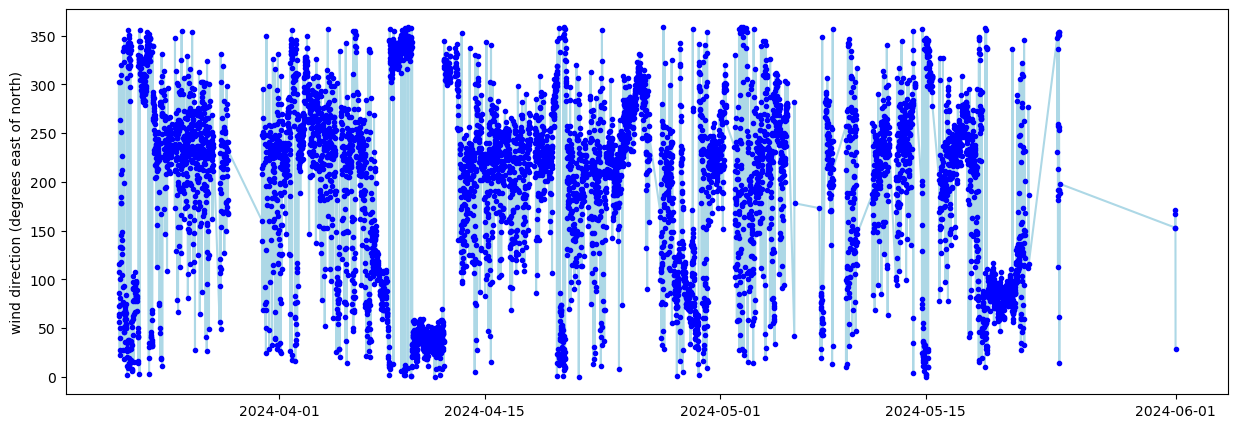

In [24]:
filtered = df[df['value']!=999]

fig,ax = plt.subplots(figsize=(15,5))
ax.plot(filtered.index, filtered['value'], color='lightblue')
ax.plot(filtered.index, filtered['value'], color='blue', marker='.', linestyle='none')
ax.set_ylabel('wind direction (degrees east of north)')

## &nbsp;7. Rainfall
## Basic data retrieval and graphing

Rainfall data are collected at a site where hot spring temperature is thought may be influenced by a cooling effect of heavy rain. We request data on rainfall from Arawhata Road, Taranaki.

For all envirosensor data:
- domain = `envirosensor`

The specific parameters are:
  - station = `TRAR1`, the station code for Arawhata Road
  - name (type of data) = `total-rainfall`, in this case the total rainfall in 10 minutes
  - sensorcode = `05`, code for the specific sensor number
  - method (of data collection) = `tot`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `TRAR1/total-rainfall/05/tot/-`

Date range:
  - startdate = `2024-02-01`
  - enddate = `2024-05-31`

Complete request
- `envirosensor/TRAR1/total-rainfall/05/tot/-/2024-02-01/2024-05-31`

In [25]:
url = source+'envirosensor/TRAR1/total-rainfall/05/tot/-/2024-02-01/2024-05-31'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2024-02-01 00:00:00+00:00,envirosensor,TRAR1,total-rainfall,5,tot,nil,0.0,mm,0.0,mm,NaN
2024-02-01 00:10:00+00:00,envirosensor,TRAR1,total-rainfall,5,tot,nil,0.0,mm,0.0,mm,NaN
2024-02-01 00:20:00+00:00,envirosensor,TRAR1,total-rainfall,5,tot,nil,0.0,mm,0.0,mm,NaN
2024-02-01 00:30:00+00:00,envirosensor,TRAR1,total-rainfall,5,tot,nil,0.0,mm,0.0,mm,NaN
2024-02-01 00:40:00+00:00,envirosensor,TRAR1,total-rainfall,5,tot,nil,0.0,mm,0.0,mm,NaN


### Basic Data Plot
By using the value column from our dataframe we are able to produce a basic graph of rainfall against time. Many observations are zero as no rain was recorded during the interval since the last measurement. 

Text(0, 0.5, 'total rainfall in 10 minutes (mm)')

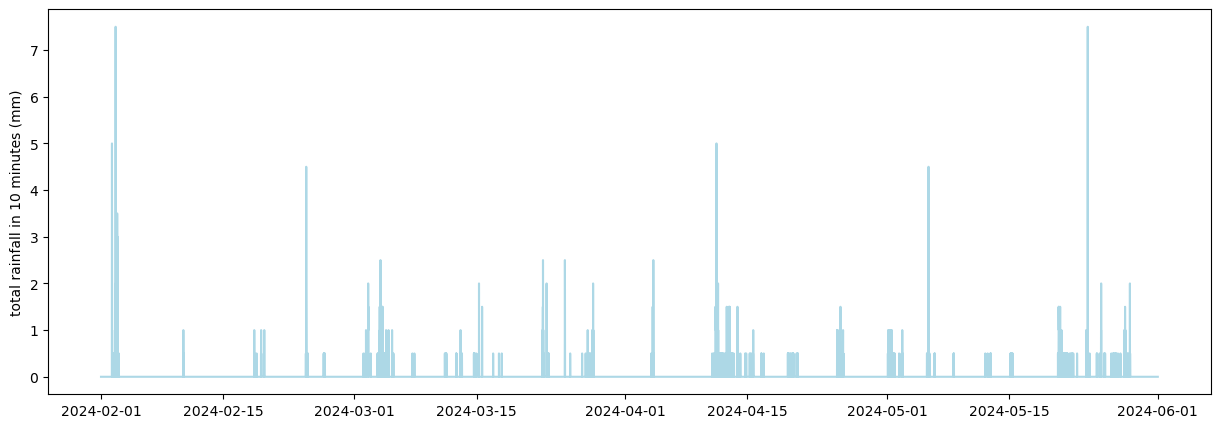

In [26]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='lightblue')
ax.set_ylabel('total rainfall in 10 minutes (mm)')

## &nbsp;8. Retrieval without specifying data collection method
## Using MultiGas data

In some cases there are multiple data collection methods (or sensor types) used to collect the same type of data. If you do not specify the collection method, the query returns data for all available methods. 

We request MultiGas data on the concentration of carbon dioxide (CO$_2$) from the station near the summit of Ngauruhoe.
There are three methods:
- max (the maximum value in the sampling interval)
- min(the minimum value in the sampling interval)
- snapshot (the value at the exact time the observation was made)<br>
In most cases, `snapshot` is the approprite method to use as the observations change slowly, but in some cases `max` or `min` may be more appropriate.

For all envirosensor data:
- domain = `envirosensor`

The specific parameters are:
  - station = `NA002`, the station code for the station near the summit of Ngauruhoe
  - name (type of data) = `air-CO2-conc`
  - sensorcode = `04`, code for the specific sensor number
  - method (of data collection) = `-`, is not set
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `NA002/air-CO2-conc/04/-/-`

Date range:
  - startdate = `2024-08-01`
  - enddate = `2024-08-31`

Complete request
- `envirosensor/NA002/air-CO2-conc/04/-/-/2024-08-01/2024-08-31`

In [27]:
url = source+'envirosensor/NA002/air-CO2-conc/04/-/-/2024-08-01/2024-08-31'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2024-08-01 00:00:00+00:00,envirosensor,NA002,air-CO2-conc,4,max,nil,435.849,ppm,0.0,ppm,NaN
2024-08-01 00:10:00+00:00,envirosensor,NA002,air-CO2-conc,4,max,nil,434.342,ppm,0.0,ppm,NaN
2024-08-01 00:20:00+00:00,envirosensor,NA002,air-CO2-conc,4,max,nil,431.382,ppm,0.0,ppm,NaN
2024-08-01 00:30:00+00:00,envirosensor,NA002,air-CO2-conc,4,max,nil,431.323,ppm,0.0,ppm,NaN
2024-08-01 00:40:00+00:00,envirosensor,NA002,air-CO2-conc,4,max,nil,436.079,ppm,0.0,ppm,NaN


You notice that the top five rows of the dataframe (from `df.head()`) show a method of `max`. The query returns the data sorted first by `method` and then by `timestamp`. If we examine the values of `method` we see what methods were returned, in this case `max`, `min`, `snapshot`. 

In [28]:
df['method'].unique() #give all the values for method

array(['max', 'min', 'snapshot'], dtype=object)

If you want CO$_2$ concentrations for all data collection methods, you can make a query for each method, or a single query and than later select which data you are interested in.

We produce a basic graph of the CO$_2$ concentration against time and show values using the `max` and `min` data collection methods. 

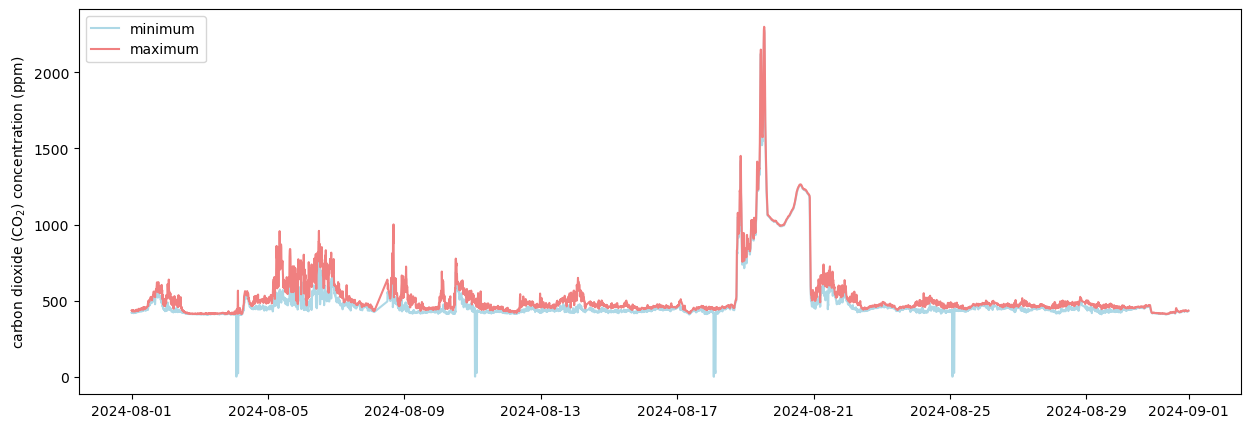

In [29]:
fig,ax = plt.subplots(figsize=(15,5))
minimum = df[df['method']=='min']
ax.plot(minimum.index, minimum['value'], color='lightblue', label='minimum')
maximum = df[df['method']=='max']
ax.plot(maximum.index, maximum['value'], color='lightcoral', label='maximum')

ax.set_ylabel('carbon dioxide (CO$_2$) concentration (ppm)')
ax.legend(loc='upper left')

## &nbsp;9. Retrieval without specifying sensor code
## Using fumarole temperature data

In some cases multiple sensor are used at a single station to collect the same type of data. This commonly occurs to provide "redundancy" of data, and as a check that a change in observed value is due to a change in the property of a feature being measured and not a degradadtion of a sensor. This is required as we often want an independent estimate of the observations being collected.

We request temperture data from a fumarole near Upper Emerald Lake on Mt Tongariro.

For all manually collected data:
- domain = `envirosensor`

The specific parameters are:
  - station = `TOUEM`, the station code for Tongariro Upper Emerald
  - name (type of data) = `fumarole-temperature`
  - sensorcode = `-`, is not set to get all relevant sensorcodes
  - method (of data collection) = `snapshot`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `TOUEM/fumarole-temperature/-/snapshot/-`

Date range:
  - startdate = `2024-08-01`
  - enddate = `2024-08-31`

Complete request
- `envirosensor/TOUEM/fumarole-temperature/-/snapshot/-/2024-08-01/2024-08-31`

In [30]:
url = source+'envirosensor/TOUEM/fumarole-temperature/-/snapshot/-/2024-08-01/2024-08-31'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2024-08-01 00:00:00+00:00,envirosensor,TOUEM,fumarole-temperature,3,snapshot,nil,89.20331,degC,0.0,degC,NaN
2024-08-01 00:10:00+00:00,envirosensor,TOUEM,fumarole-temperature,3,snapshot,nil,89.17490,degC,0.0,degC,NaN
2024-08-01 00:20:00+00:00,envirosensor,TOUEM,fumarole-temperature,3,snapshot,nil,89.14563,degC,0.0,degC,NaN
2024-08-01 00:30:00+00:00,envirosensor,TOUEM,fumarole-temperature,3,snapshot,nil,89.10428,degC,0.0,degC,NaN
2024-08-01 00:40:00+00:00,envirosensor,TOUEM,fumarole-temperature,3,snapshot,nil,89.06899,degC,0.0,degC,NaN


There are two unique sensor codes, each representing an individual temperature sensor.

In [31]:
df['sensorCode'].unique() #give all the values for sensorCode

array([3, 4])

You can make a query each sensor code separately, or use a single query and than later select which data you are interested in.

We produce a basic graph of fumarole temperature against time and show values for each of the sensor codes. 

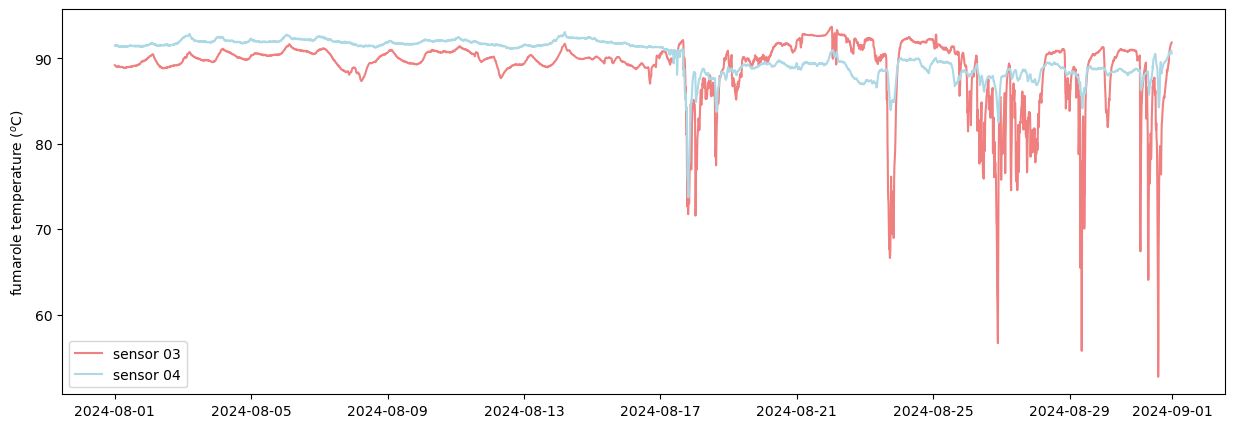

In [32]:
fig,ax = plt.subplots(figsize=(15,5))
sens03 = df[df['sensorCode']==3]
ax.plot(sens03.index, sens03['value'], color='lightcoral', label='sensor 03')

sens04 = df[df['sensorCode']==4]
ax.plot(sens04.index, sens04['value'], color='lightblue', label='sensor 04')

ax.set_ylabel('fumarole temperature ($^o$C)')
ax.legend(loc='lower left')